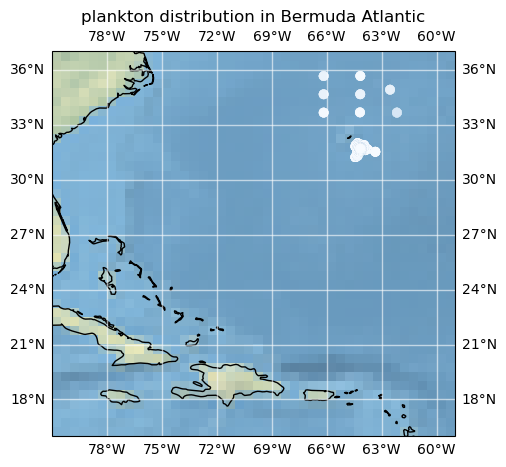

In [2]:
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
from matplotlib.colorbar import Colorbar

########
#this part of the code shows zoom out view of the map and 
#where the data is collected
########

#save file path and load the data
file_path = 'BATS_Bottle.csv'
df = pd.read_csv(file_path, low_memory=False)
ds = xr.Dataset.from_dataframe(df)#convert to xrarry for plor

plt.figure(figsize=(10, 5))#set figure size
ax = plt.axes(projection=ccrs.PlateCarree())#set map type
ax.coastlines()#add coastlines
ax.stock_img()#add background image of topography
ax.set_extent([-59, -81, 16, 37])#set range of area the plot cover
ax.scatter(ds['lon'], ds['lat'], c=ds['prochlorococcus'], cmap='Blues')
#plt.colorbar(sc, ax=ax, label='prochlorococcus distribition concentration in cells/ml')
#colorbar is not necessary since only want to show where data is collected
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, #add and adjust gridlines
                  linewidth=1, color='white', alpha=0.6)
plt.title('plankton distribution in Bermuda Atlantic')#set title
plt.show()#show title


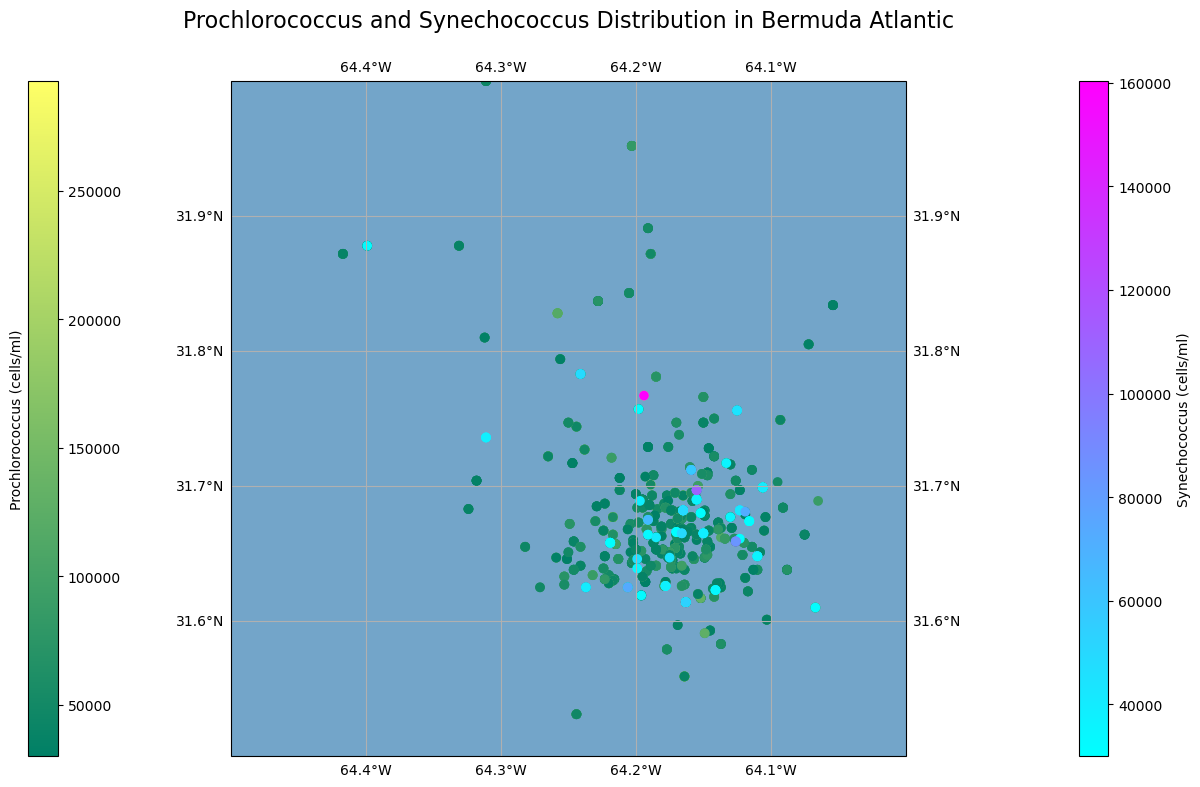

In [3]:
########
#this part of the code shows zoom in map of distribution of 
#prochlorococcus and synechococcus, two type of plankton
########

#Load data
file_path = 'BATS_Bottle.csv'
df = pd.read_csv(file_path, low_memory=False)

#filter data by type of plankton, only keep when abundance is
#above level of significance
prochlorococcus_df = df[df['prochlorococcus'] > 30000]
synechococcus_df = df[df['synechococcus'] > 30000]
#convert to xarray Dataset
prochlorococcus_ds = xr.Dataset.from_dataframe(prochlorococcus_df)
synechococcus_ds = xr.Dataset.from_dataframe(synechococcus_df)

plt.figure(figsize=(12, 9))#set figure size
plt.subplots_adjust(left=0.15, right=0.85, top=0.90, bottom=0.15)#adjust the margin 
#specify the format and size of the plot, with 2 subplots(colorbars)
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 30, 1], left=0.05, right=0.95)
ax = plt.subplot(gs[1], projection=ccrs.PlateCarree())#set map
ax.stock_img()#add background image of topography
ax.set_extent([-64.5, -64, 31.5, 32])#set range of area the plot cover
ax.gridlines(draw_labels=True)#set grid line
#add data points and their labels
sc1 = ax.scatter(prochlorococcus_ds['lon'], prochlorococcus_ds['lat'],
                 c=prochlorococcus_ds['prochlorococcus'], cmap='summer', label='Prochlorococcus')
sc2 = ax.scatter(synechococcus_ds['lon'], synechococcus_ds['lat'],
                 c=synechococcus_ds['synechococcus'], cmap='cool', label='Synechococcus')
cb_ax1 = plt.subplot(gs[0])#set the left color bar for prochlorococcus
cb1 = Colorbar(ax=cb_ax1, mappable=sc1, orientation='vertical')
#adjust the position so it does not overlap with main plot, and add label
cb1.set_label('Prochlorococcus (cells/ml)', labelpad=-80)
# same for the right color bar for synechococcus
cb_ax2 = plt.subplot(gs[2])
cb2 = Colorbar(ax=cb_ax2, mappable=sc2, orientation='vertical')
cb2.set_label('Synechococcus (cells/ml)')
plt.suptitle('Prochlorococcus and Synechococcus Distribution in Bermuda Atlantic', fontsize=16)#set title
plt.show()


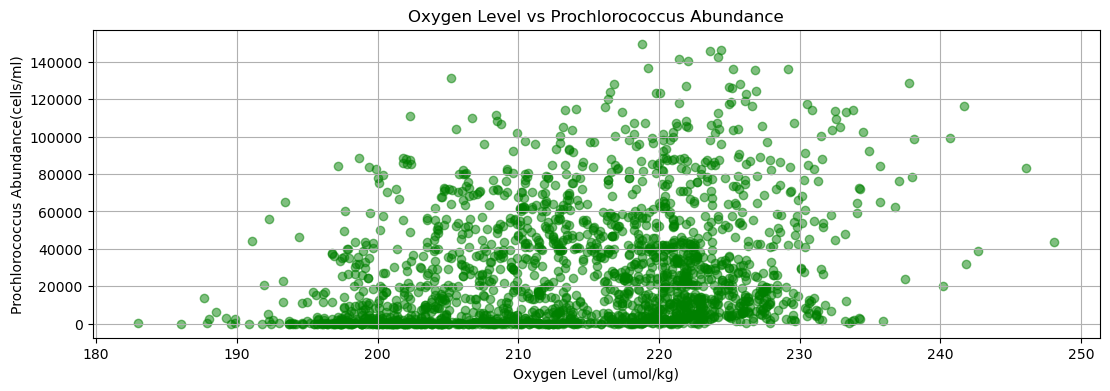

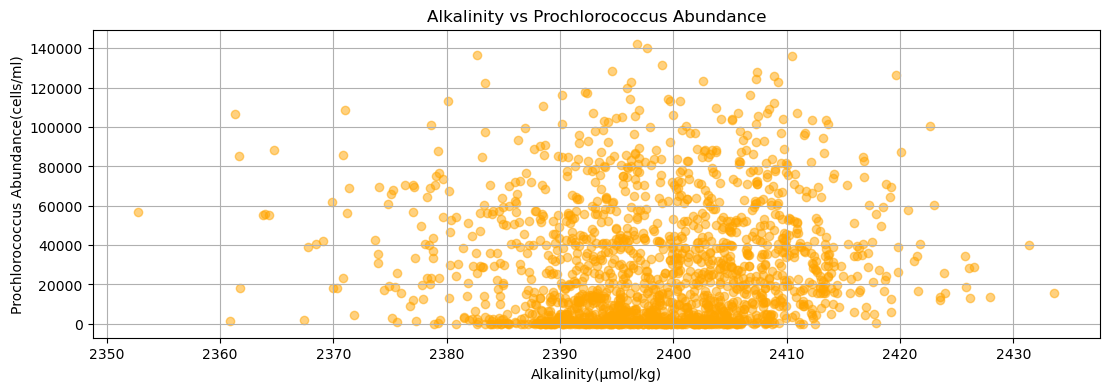

In [4]:
########
#this part of the code shows plot of oxygen and alkalinity vs prochlorococcus
########

#filter data to exclude any missing data
oxygen_proch_df = df.dropna(subset=['oxygen', 'prochlorococcus'])
alkalinity_proch_df = df.dropna(subset=['alkalinity', 'prochlorococcus'])
#delete outlier
oxygen_proch_df = oxygen_proch_df[oxygen_proch_df['prochlorococcus'] < 150000]
alkalinity_proch_df = alkalinity_proch_df[alkalinity_proch_df['alkalinity'] > 2320]
alkalinity_proch_df = alkalinity_proch_df[alkalinity_proch_df['prochlorococcus'] < 150000]

#create oxygen vs proch plot
plt.figure(figsize=(13, 4))#set figure size
#add data points
plt.scatter(oxygen_proch_df['oxygen'], oxygen_proch_df['prochlorococcus'], alpha=0.5, color='green')
plt.title('Oxygen Level vs Prochlorococcus Abundance')#set title
plt.xlabel('Oxygen Level (umol/kg)')#set x label
plt.ylabel('Prochlorococcus Abundance(cells/ml)')#set y label
plt.grid(True)#add grid
plt.show()

#create alkalinity vs proch plot
plt.figure(figsize=(13, 4))#set figure size
#add data points
plt.scatter(alkalinity_proch_df['alkalinity'], alkalinity_proch_df['prochlorococcus'], alpha=0.5, color='orange')
plt.title('Alkalinity vs Prochlorococcus Abundance')#set title
plt.xlabel('Alkalinity(μmol/kg)')#set x label
plt.ylabel('Prochlorococcus Abundance(cells/ml)')#set y label
plt.grid(True)#add grid
plt.show()


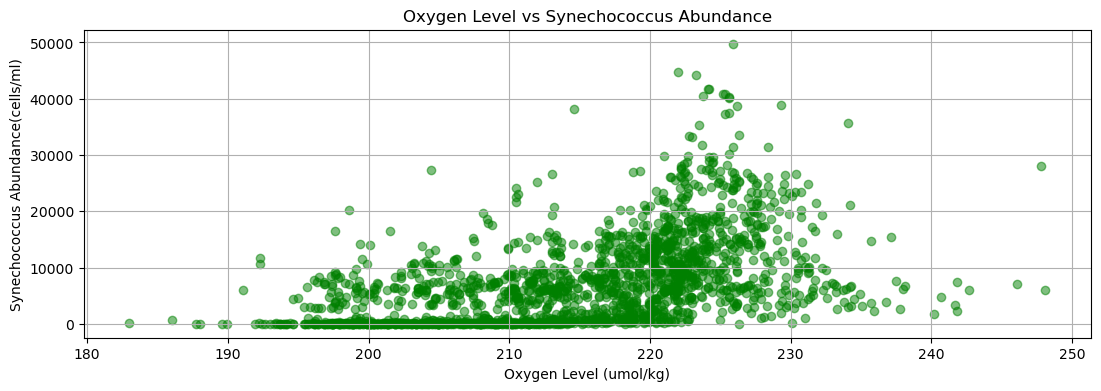

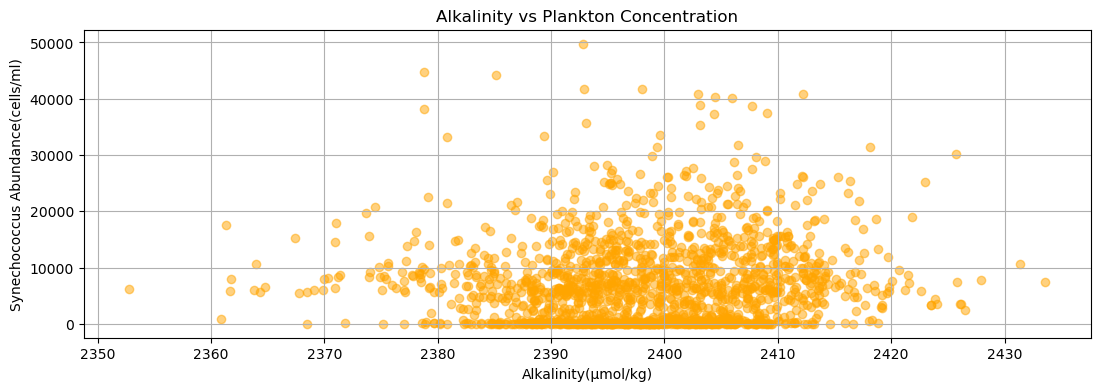

In [39]:
########
#this part of the code shows plot of oxygen and alkalinity vs synechococcus
########

#filter data to exclude any missing data
oxygen_synech_df = df.dropna(subset=['oxygen', 'synechococcus'])
alkalinity_synech_df = df.dropna(subset=['alkalinity', 'synechococcus'])
#delete outlier
oxygen_synech_df = oxygen_synech_df[oxygen_synech_df['synechococcus'] < 50000]
alkalinity_synech_df = alkalinity_synech_df[alkalinity_synech_df['alkalinity'] > 2320]
alkalinity_synech_df = alkalinity_synech_df[alkalinity_synech_df['synechococcus'] < 50000]

#create oxygen vs proch plot
plt.figure(figsize=(13, 4))#set figure size
#add data points
plt.scatter(oxygen_synech_df['oxygen'], oxygen_synech_df['synechococcus'], alpha=0.5, color='green')
plt.title('Oxygen Level vs Synechococcus Abundance')#set title
plt.xlabel('Oxygen Level (umol/kg)')#set x label
plt.ylabel('Synechococcus Abundance(cells/ml)')#set y label
plt.grid(True)#add grid
plt.show()

#create alkalinity vs proch plot
plt.figure(figsize=(13, 4))#set figure size
#add data points
plt.scatter(alkalinity_synech_df['alkalinity'], alkalinity_synech_df['synechococcus'], alpha=0.5, color='orange')
plt.title('Alkalinity vs Synechococcus Abundance')#set title
plt.xlabel('Alkalinity(μmol/kg)')#set x label
plt.ylabel('Synechococcus Abundance(cells/ml)')#set y label
plt.grid(True)#add grid
plt.show()